# Word meanings

* Defining "meaning" is challenging in NLP and psycholinguistics
* Typically, what we want is to understand words well enough to make judgments or predictions from them
* Can include things like world knowledge (e.g., "dogs are living creatures")

In general, we as NLP practitioners do not have access to word meanings. For example, even our ideas of what a *dog* is will differ depending on:
  * The language or dialect we are speaking
  * Where we grew up in the world
  * Socioeconomic variables
  * Expertise

And what we infer about the word _dog_ will depend on the linguistic context. A _hot dog_ that you eat is a very different thing than a _hot dog_ who should come inside to prevent overheating.

In general, we want to build systems of word meanings that are:

* Able to capture core aspects of a word's properties
* Flexible with respect to context
* Useful for understanding natural language


## Distributional assumption

Originally stated as something like, "You shall know a thing by the company it keeps" (Firth, 1957). This assumption assumes that there are general environmental regularities -- i.e., _distributional_ regularities -- that provide a clue as to what kind of word (or sound, etc.) something is.

The two main classes of distributions we will care about:

### Paradigmatic similarity
  * Two things that can fit in the same "slot"
  * Two words $w_i$ and $w_j$ both occur in the same general types of environments
  * e.g., all of the verbs in "I **[drank/bought/want/love]** coffee" share a _paradigmatic_ relationship
  * Example from class: All of the words that follow the word "parsing"

### Syntagmatic similarity
  * Two things that can fit in separate slots in the same context
  * NOT similar in meaning
  * I drank <u>__hot__</u> <u>__coffee__</u>
  * Two words $w_i$ and $w_j$ typically appear together
  * e.g., The words "hot" and "coffee" typically occur in sequence
  * Example from class: The bigram frequency of "parsing" and "algorithms"

Fun empirical analysis of similarity and meaning: [Rapp (2002): The Computation of Word Associations:  
Comparing Syntagmatic and Paradigmatic Approaches. Proceedings of COLING.](https://aclanthology.org/C02-1007/)

## Why make the distributional assumption?

* Because we do not normally have access to "real" word meanings
* Because we want to combat sparsity
  * Clever distributional approaches can "smooth" counts
  * We can "learn" indirectly from other examples
  * _Parameter sharing_

### The distributional assumption has been highly successful.

Responsible for nearly all of modern day neural network language modeling. 

## Distributional semantics models that we will cover in the following weeks:

1. Matrix factorization methods
  * Latent Semantic Analysis (Landauer & Dumais, 1997)
  * Co-occurrence matrices
  * Mutual information matrices
  * GloVe (Pennington, Socher, & Manning, 2014)
2. Neural Network methods
  * word2vec
  * fastText
  * Recurrent neural networks and LSTMs
3. Topic Models (Latent Dirichlet Allocation)
  * Flat topic models
  * Hierarchical topic models

## Tasks that we will cover in the following weeks:

1. Semantic similarity between words
2. Word sense disambiguation
3. Unsupervised clustering
4. Formal ontologies and resources for word sense information

# Code review

We're just going to check out one abstract and do some basic text processing on it to compute it into a bag-of-words **dictionary**, and then **vector** representation

In [ ]:
# !python -m spacy download en_core_web_lg

In [ ]:
from google.colab import drive
import json
from pprint import pprint
import spacy
from collections import Counter
import numpy as np

nlp = spacy.load("en_core_web_lg") # if you download this you might have to restart runtime

drive.mount("/content/drive/", force_remount=True)

with open("/content/drive/MyDrive/Fall 2021 Computational Linguistics Notebooks/"
          "files/abstracts.tsv", 'r') as abstract_file:
  abstracts = [nlp(line) for line in abstract_file] # already tokenized

Mounted at /content/drive/


In [ ]:
pprint(abstracts[180].text) # text from one tokenized document

('Pre-trained models like Bidirectional Encoder Representations from '
 'Transformers (BERT), have recently made a big leap forward in Natural '
 'Language Processing (NLP) tasks. However, there are still some shortcomings '
 'in the Masked Language Modeling (MLM) task performed by these models. In '
 'this paper, we first introduce a multi-graph including different types of '
 'relations between words. Then, we propose Multi-Graph augmented BERT '
 '(MG-BERT) model that is based on BERT. MG-BERT embeds tokens while taking '
 'advantage of a static multi-graph containing global word co-occurrences in '
 'the text corpus beside global real-world facts about words in knowledge '
 'graphs. The proposed model also employs a dynamic sentence graph to capture '
 'local context effectively. Experimental results demonstrate that our model '
 'can considerably enhance the performance in the MLM task.\n')


## Review of bag-of-words with dictionaries


In [ ]:
def bag_of_words(tokenized_document: list, vocabulary: set):
  bag = {}
  counts = Counter(tokenized_document)
  # set up the bag of words
  # all words are assumed to start with 0
  for word in vocabulary:
    bag[word] = 0
  # update the counts based on what is in Counter
  for token in tokenized_document:
    if token in vocabulary:
      bag[token] = counts[token]
    else:
      pass
  return bag

In [ ]:
vocabulary = set([])
for abstract in abstracts:
  for token in abstract:
    w_string = token.text
    vocabulary.add(w_string)

my_abstract = abstracts[180]
tokenized_abstract = [x.text for x in my_abstract]
doc_180_bag = bag_of_words(tokenized_document=tokenized_abstract, vocabulary=vocabulary)
# show all the non-zero counts
{x: doc_180_bag[x] for x in doc_180_bag if doc_180_bag[x]>0}

{'\n': 1,
 '(': 4,
 ')': 4,
 ',': 4,
 '-': 8,
 '.': 7,
 'BERT': 5,
 'Bidirectional': 1,
 'Encoder': 1,
 'Experimental': 1,
 'Graph': 1,
 'However': 1,
 'In': 1,
 'Language': 2,
 'MG': 2,
 'MLM': 2,
 'Masked': 1,
 'Modeling': 1,
 'Multi': 1,
 'NLP': 1,
 'Natural': 1,
 'Pre': 1,
 'Processing': 1,
 'Representations': 1,
 'The': 1,
 'Then': 1,
 'Transformers': 1,
 'a': 4,
 'about': 1,
 'advantage': 1,
 'also': 1,
 'are': 1,
 'augmented': 1,
 'based': 1,
 'beside': 1,
 'between': 1,
 'big': 1,
 'by': 1,
 'can': 1,
 'capture': 1,
 'co': 1,
 'considerably': 1,
 'containing': 1,
 'context': 1,
 'corpus': 1,
 'demonstrate': 1,
 'different': 1,
 'dynamic': 1,
 'effectively': 1,
 'embeds': 1,
 'employs': 1,
 'enhance': 1,
 'facts': 1,
 'first': 1,
 'forward': 1,
 'from': 1,
 'global': 2,
 'graph': 3,
 'graphs': 1,
 'have': 1,
 'in': 5,
 'including': 1,
 'introduce': 1,
 'is': 1,
 'knowledge': 1,
 'leap': 1,
 'like': 1,
 'local': 1,
 'made': 1,
 'model': 3,
 'models': 2,
 'multi': 2,
 'occurrences

# Vectors and vector approximations of word meanings

In [ ]:
def bag_of_words_vector(bag: dict, vocabulary: set):
  # create a vector -- approximate using a list
  bow_vector = []
  # loop through our fixed vocabulary
  # this will "fix" all the dimensions
  for word in vocabulary:
    word_frequency = bag[word]
    bow_vector.append(word_frequency)
  return bow_vector

# build a vector for the 180th abstract
# we expect to see a ton of 0s
bow_vector = bag_of_words_vector(bag=doc_180_bag, vocabulary=vocabulary)

Bag-of-words representations are _incredibly_ sparse and therefore we want to see how sparse they are. To do this, we can transform our bag-of-words vector representation into a **binary** version of that same vector. That is, we'll turn anything greater than or equal to 1 into a 1. Then, we can see what proportion of the entries in the long sparse vector are not 0s, to get a sense of how many unique words are used out of our full vocabulary.

In [ ]:
# in first abstract, what proportion of all words have non-zero values?
bow_first_abstract = bag_of_words_vector(
    bag=doc_180_bag,
    vocabulary=vocabulary)

# convert our existing array into an array of only 0s and 1s
nonzero = [x > 0 for x in bow_first_abstract]

number_nonzero_for_abstract = sum(nonzero)
vocabulary_size = len(vocabulary)

print(f"probability of non-zeros (proportion with values > 0):"
      f" {number_nonzero_for_abstract / vocabulary_size}")

probability of non-zeros (proportion with values > 0): 0.0014981065597647419


# Why do we want bag-of-words representations?

Bag-of-words representations are the building block of our analyses of word meanings. While we might change the way we define the "bag" or context surrounding our words, the **representation** we use is numerically what we want to work with -- a large, high-dimensional, extremely sparse vector.

This may be surprising to you because we have talked a lot about sparsity being a bad thing. However, for distributional semantics, it is good to be sparse because sparser is faster. We still run into estimation issues for very low-frequency events, however.

Wednesday and Friday will cover how we actually use the bag-of-words representations to obtain word vectors. For now, we focus on what the word vectors end up looking like.

# What are word vectors?

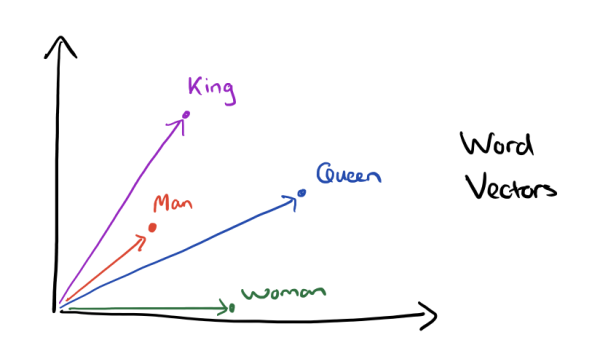

## Getting word vectors from spaCy

`spaCy` can give us word vectors directly -- using the `.vector` method, similar to `.text` or `.dep_` etc. Let's see this in action now that we have tokenized our files:

In [ ]:
for token in my_abstract:
  vector = token.vector
  print(vector)

Streaming output truncated to the last 5000 lines.
 -3.6070e-01  3.0997e-01 -1.9727e-01 -1.4320e-01 -1.6747e-01  4.2435e-04
 -1.5120e-01  6.7562e-02 -3.8644e-01  2.5349e-02  2.4918e-01 -2.3955e-01
 -1.5615e-01  4.9868e-01  8.2758e-03 -1.9120e-01 -1.4906e-01  4.8757e-01
 -1.5281e-02  1.0196e-02  3.7642e-01 -1.9460e-02 -2.7835e-01  1.6355e-01
 -2.4127e-01 -2.1405e-01 -2.1562e-01 -7.9697e-01  3.4321e-01  9.3209e-02
  7.3977e-02 -2.7147e-01  2.0539e-01  1.5061e-01  2.0734e-02  1.1267e-01
  2.8714e-02  2.9670e-01 -2.1267e-01  4.3214e-01  1.2788e-01  2.9249e-01
  1.9056e-01 -2.9113e-01 -1.1382e-01 -3.8242e-02 -2.0290e-01  1.8301e-01
 -1.6661e-01 -2.7116e-01  1.2685e-03  7.1704e-02 -1.8583e-01  8.9850e-02
 -3.9895e-02  3.9479e-01  5.3211e-03 -6.1548e-04 -2.7082e-01 -8.9782e-02
 -2.8790e-01 -1.4865e-01 -1.3746e+00  1.6515e-01  2.0598e-01  1.5252e-01
  3.4723e-02 -3.8531e-01 -9.4574e-02 -1.9871e-01  5.0239e-01 -2.8702e-01
 -8.8727e-02  5.6881e-02  1.3634e-01  1.9034e-01 -1.9353e-01  4.0506e-01
